In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

import joblib
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

## Importing Data

In [2]:
df_origin=pd.read_csv("data.csv")

#Discover columns for the dataframe
df_origin.info()

oldcolumns=df_origin.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260748 entries, 0 to 260747
Data columns (total 49 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   ID                                     260748 non-null  object 
 1   BuildingType                           260748 non-null  object 
 2   ClimateZone                            260748 non-null  object 
 3   TotalArea                              260748 non-null  int64  
 4   TotalArea_Setting                      260748 non-null  object 
 5   FloorArea                              260748 non-null  int64  
 6   FloorArea_Setting                      260748 non-null  object 
 7   NumFloors                              260748 non-null  int64  
 8   PlateDepth                             260748 non-null  int64  
 9   PlateDepth_Setting                     260748 non-null  object 
 10  PlateLength                            260748 non-null  

In [3]:
df_origin.head()

,ID,BuildingType,ClimateZone,TotalArea,TotalArea_Setting,FloorArea,FloorArea_Setting,NumFloors,PlateDepth,PlateDepth_Setting,PlateLength,FloorHeight,FloorHeight_Setting,Height,WWR,WWR_surfaces,SolarDesign,Standard,HVAC,HVAC_Setting,EnvelopeQuality_Setting,Wall_R_Value,Roof_R_Value,Glass_and_Frame_U_Value,SHGC,LPD_Adjustment,LPD_Adjustment_Setting,Interior_Lights_Final_W_per_sf,Exterior_Lights_Final_1_W,Exterior_Lights_Final_2_W,Setpoint_Setting,HeatingCoil,COP_Efficiency_Heating,CoolingCoil,COP_Efficiency_Cooling,EUI_kBTU_per_sf,Electricity_Facility_kBTU_per_sf,NaturalGas_Facility_kBTU_per_sf,Cooling_Electricity_kBTU_per_sf,Heating_Electricity_kBTU_per_sf,Heating_NaturalGas_kBTU_per_sf,Heating_Total_kBTU_per_sf,WaterSystems_Electricity_kBTU_per_sf,Lighting_Electricity_kBTU_per_sf,Equipment_Electricity_kBTU_per_sf,Fans_Electricity_kBTU_per_sf,Pumps_Electricity_kBTU_per_sf,HeatRejection_Electricity_kBTU_per_sf,HeatRecovery_Electricity_kBTU_per_sf
0,College_1A_100000_14286_120_13_25_20_25_BaseLi...,College,1A,101793,low,14542,low,7,122,high,350,13,low,91,74.152542,.25_.25_.25_.25,Bad,90.1-2013,PVAV with PFP boxes,Baseline,UltraPerformance,30.0,60.0,0.2,0.25,1.0,Base,1.0,441.8,8552.0,Baseline,Coil:Heating:Electric,1,Chiller:Electric:EIR,2.960438,115.604715,115.604715,0.0,47.056517,0.083671,0.0,0.083671,0.0,10.209886,44.423582,5.378116,4.748715,0.0,3.704229
1,College_1A_100000_14286_120_13_25_20_25_BaseLi...,College,1A,101793,low,14542,low,7,122,high,350,13,low,91,74.152542,.25_.25_.25_.25,Bad,90.1-2013,PVAV with PFP boxes,Baseline,UltraPerformance,30.0,60.0,0.2,0.25,1.0,Base,1.0,441.8,8552.0,Expanded,Coil:Heating:Electric,1,Chiller:Electric:EIR,2.960438,111.274307,111.274307,0.0,44.545202,0.083671,0.0,0.083671,0.0,10.209886,44.423582,3.689256,4.675590,0.0,3.647120
2,College_1A_100000_14286_120_13_25_20_25_BaseLi...,College,1A,101793,low,14542,low,7,122,high,350,13,low,91,74.152542,.25_.25_.25_.25,Good,90.1-2013,PVAV with PFP boxes,Baseline,UltraPerformance,30.0,60.0,0.2,0.25,1.0,Base,1.0,441.8,8552.0,Baseline,Coil:Heating:Electric,1,Chiller:Electric:EIR,2.960438,112.613514,112.613514,0.0,44.163188,0.083856,0.0,0.083856,0.0,10.209886,44.423582,5.725152,4.350329,0.0,3.657521
3,College_1A_100000_14286_120_13_25_20_25_BaseLi...,College,1A,101793,low,14542,low,7,122,high,350,13,low,91,74.152542,.25_.25_.25_.25,Good,90.1-2013,PVAV with PFP boxes,Baseline,UltraPerformance,30.0,60.0,0.2,0.25,1.0,Base,1.0,441.8,8552.0,Expanded,Coil:Heating:Electric,1,Chiller:Electric:EIR,2.960438,107.493595,107.493595,0.0,41.248394,0.083856,0.0,0.083856,0.0,10.209886,44.423582,3.751486,4.224587,0.0,3.551803
4,College_1A_100000_14286_120_13_25_20_25_BaseLi...,College,1A,101793,low,14542,low,7,122,high,350,13,low,91,25.000000,.25_.25_.25_.25,Typical,90.1-2013,PVAV with PFP boxes,Baseline,UltraPerformance,30.0,60.0,0.2,0.25,1.0,Base,1.0,441.8,8552.0,Baseline,Coil:Heating:Electric,1,Chiller:Electric:EIR,2.960438,108.149023,108.149023,0.0,41.004111,0.062975,0.0,0.062975,0.0,10.209886,44.423582,4.730901,4.131386,0.0,3.586181


## Checking Null values

In [4]:
#No null values
pd.DataFrame(df_origin.isnull().sum()).T

,ID,BuildingType,ClimateZone,TotalArea,TotalArea_Setting,FloorArea,FloorArea_Setting,NumFloors,PlateDepth,PlateDepth_Setting,PlateLength,FloorHeight,FloorHeight_Setting,Height,WWR,WWR_surfaces,SolarDesign,Standard,HVAC,HVAC_Setting,EnvelopeQuality_Setting,Wall_R_Value,Roof_R_Value,Glass_and_Frame_U_Value,SHGC,LPD_Adjustment,LPD_Adjustment_Setting,Interior_Lights_Final_W_per_sf,Exterior_Lights_Final_1_W,Exterior_Lights_Final_2_W,Setpoint_Setting,HeatingCoil,COP_Efficiency_Heating,CoolingCoil,COP_Efficiency_Cooling,EUI_kBTU_per_sf,Electricity_Facility_kBTU_per_sf,NaturalGas_Facility_kBTU_per_sf,Cooling_Electricity_kBTU_per_sf,Heating_Electricity_kBTU_per_sf,Heating_NaturalGas_kBTU_per_sf,Heating_Total_kBTU_per_sf,WaterSystems_Electricity_kBTU_per_sf,Lighting_Electricity_kBTU_per_sf,Equipment_Electricity_kBTU_per_sf,Fans_Electricity_kBTU_per_sf,Pumps_Electricity_kBTU_per_sf,HeatRejection_Electricity_kBTU_per_sf,HeatRecovery_Electricity_kBTU_per_sf
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
null={}
#Extract Categorical columns
for column in set(df_origin.columns)-set(df_origin.describe().columns):
    
    value=df_origin[column].str.contains('Nan').sum()
    null[column]=value
null

{'WWR_surfaces': 0,
 'HeatingCoil': 0,
 'Standard': 0,
 'COP_Efficiency_Heating': 177720,
 'ClimateZone': 0,
 'EnvelopeQuality_Setting': 0,
 'HVAC_Setting': 0,
 'PlateDepth_Setting': 0,
 'TotalArea_Setting': 0,
 'Setpoint_Setting': 0,
 'FloorHeight_Setting': 0,
 'HVAC': 0,
 'ID': 0,
 'BuildingType': 0,
 'FloorArea_Setting': 0,
 'CoolingCoil': 0,
 'LPD_Adjustment_Setting': 0,
 'SolarDesign': 0}

In [6]:
df=df_origin.replace('Nan',np.nan)
pd.DataFrame(df.isnull().sum()).T

,ID,BuildingType,ClimateZone,TotalArea,TotalArea_Setting,FloorArea,FloorArea_Setting,NumFloors,PlateDepth,PlateDepth_Setting,PlateLength,FloorHeight,FloorHeight_Setting,Height,WWR,WWR_surfaces,SolarDesign,Standard,HVAC,HVAC_Setting,EnvelopeQuality_Setting,Wall_R_Value,Roof_R_Value,Glass_and_Frame_U_Value,SHGC,LPD_Adjustment,LPD_Adjustment_Setting,Interior_Lights_Final_W_per_sf,Exterior_Lights_Final_1_W,Exterior_Lights_Final_2_W,Setpoint_Setting,HeatingCoil,COP_Efficiency_Heating,CoolingCoil,COP_Efficiency_Cooling,EUI_kBTU_per_sf,Electricity_Facility_kBTU_per_sf,NaturalGas_Facility_kBTU_per_sf,Cooling_Electricity_kBTU_per_sf,Heating_Electricity_kBTU_per_sf,Heating_NaturalGas_kBTU_per_sf,Heating_Total_kBTU_per_sf,WaterSystems_Electricity_kBTU_per_sf,Lighting_Electricity_kBTU_per_sf,Equipment_Electricity_kBTU_per_sf,Fans_Electricity_kBTU_per_sf,Pumps_Electricity_kBTU_per_sf,HeatRejection_Electricity_kBTU_per_sf,HeatRecovery_Electricity_kBTU_per_sf
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,177720,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
#Convert to float after renaming null values
df["COP_Efficiency_Heating"]=df["COP_Efficiency_Heating"].astype('float')

## Remove Power Columns to make one target (EUI)

In [8]:
power_col=['Electricity_Facility_kBTU_per_sf',
       'NaturalGas_Facility_kBTU_per_sf', 'Cooling_Electricity_kBTU_per_sf',
       'Heating_Electricity_kBTU_per_sf', 'Heating_NaturalGas_kBTU_per_sf',
       'Heating_Total_kBTU_per_sf', 'WaterSystems_Electricity_kBTU_per_sf',
       'Lighting_Electricity_kBTU_per_sf', 'Equipment_Electricity_kBTU_per_sf',
       'Fans_Electricity_kBTU_per_sf', 'Pumps_Electricity_kBTU_per_sf',
       'HeatRejection_Electricity_kBTU_per_sf',
       'HeatRecovery_Electricity_kBTU_per_sf','Interior_Lights_Final_W_per_sf', 'Exterior_Lights_Final_1_W',
       'Exterior_Lights_Final_2_W']

df=df.drop(power_col,axis=1)

## Data Explorataion

In [9]:
#Give description of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TotalArea,260748.0,199459.523341,215695.160515,39944.000000,101633.000000,149712.000000,201851.000000,1.009256e+06
FloorArea,260748.0,25846.604507,10350.688871,14519.000000,14971.000000,24998.000000,39539.000000,4.043400e+04
NumFloors,260748.0,8.866783,10.753368,1.000000,4.000000,6.000000,10.000000,6.700000e+01
PlateDepth,260748.0,97.235906,25.367408,45.000000,75.000000,98.000000,122.000000,1.530000e+02
PlateLength,260748.0,209.707273,76.845830,129.000000,140.000000,197.000000,238.000000,4.040000e+02
FloorHeight,260748.0,14.602774,1.970821,10.000000,13.000000,15.000000,16.000000,1.800000e+01
Height,260748.0,129.436559,161.182146,13.000000,52.000000,85.000000,135.000000,1.072000e+03
WWR,260748.0,59.377107,17.593025,25.000000,50.390625,61.742424,71.228070,8.991031e+01
Wall_R_Value,260748.0,22.190043,7.072464,8.330000,16.330000,20.330000,30.000000,3.000000e+01
Roof_R_Value,260748.0,41.705422,14.076231,21.340000,31.340000,31.340000,60.000000,6.000000e+01


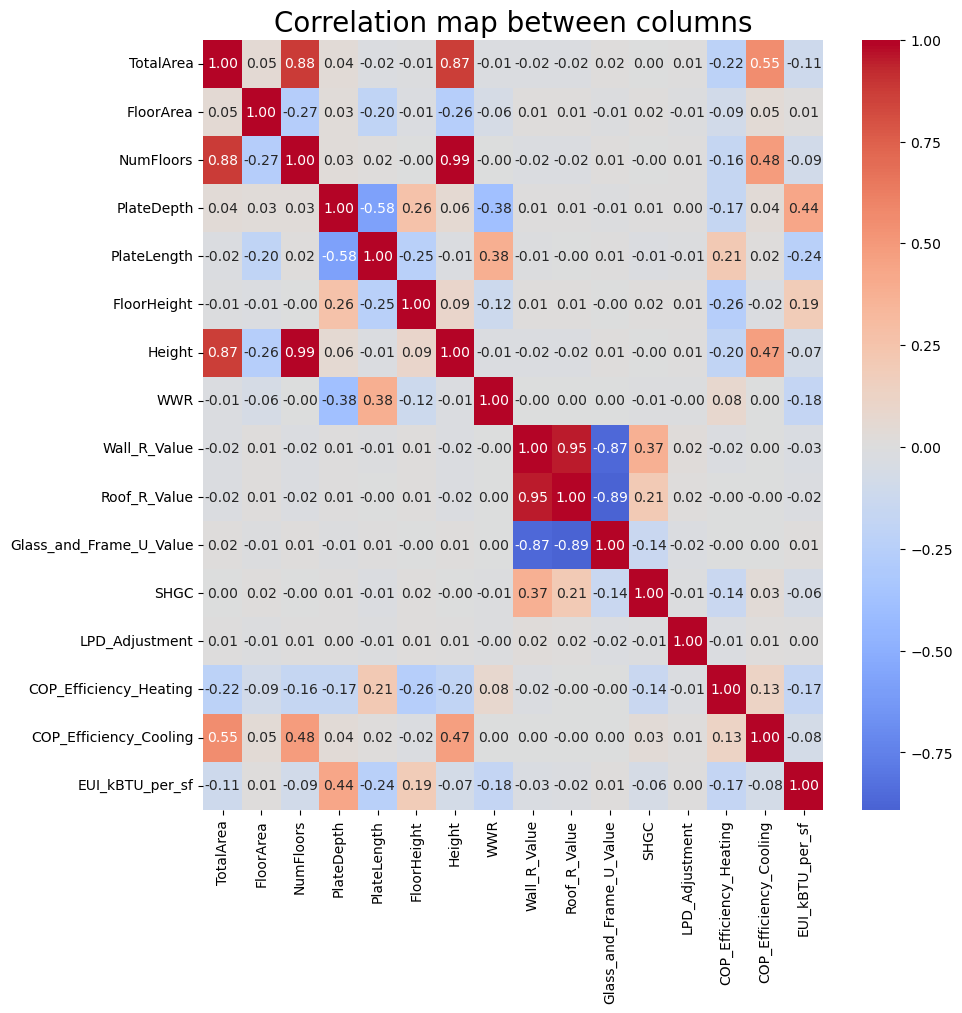

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='coolwarm', annot=True,fmt='.2f',center=0)
plt.title("Correlation map between columns",fontsize=20)
plt.show()

## Removing unnecessary columns

In [11]:
df.columns

Index(['ID', 'BuildingType', 'ClimateZone', 'TotalArea', 'TotalArea_Setting',
       'FloorArea', 'FloorArea_Setting', 'NumFloors', 'PlateDepth',
       'PlateDepth_Setting', 'PlateLength', 'FloorHeight',
       'FloorHeight_Setting', 'Height', 'WWR', 'WWR_surfaces', 'SolarDesign',
       'Standard', 'HVAC', 'HVAC_Setting', 'EnvelopeQuality_Setting',
       'Wall_R_Value', 'Roof_R_Value', 'Glass_and_Frame_U_Value', 'SHGC',
       'LPD_Adjustment', 'LPD_Adjustment_Setting', 'Setpoint_Setting',
       'HeatingCoil', 'COP_Efficiency_Heating', 'CoolingCoil',
       'COP_Efficiency_Cooling', 'EUI_kBTU_per_sf'],
      dtype='object')

In [12]:
#Columns that describe number or info that already exists
Setting=['ID','TotalArea_Setting', 'FloorArea_Setting','PlateDepth_Setting','FloorHeight_Setting',
         'WWR_surfaces','Standard','HVAC']

EnvelopeQuality=['Wall_R_Value', 'Roof_R_Value', 'Glass_and_Frame_U_Value', 'SHGC']

HighCorrelation=['NumFloors','Height']

LowCorrelation=['FloorArea','LPD_Adjustment','COP_Efficiency_Cooling']

#Remove this column because it have many missing values
Missing=['COP_Efficiency_Heating']

cols=Setting+EnvelopeQuality+LowCorrelation+HighCorrelation+Missing

df=df.drop(cols,axis=1)

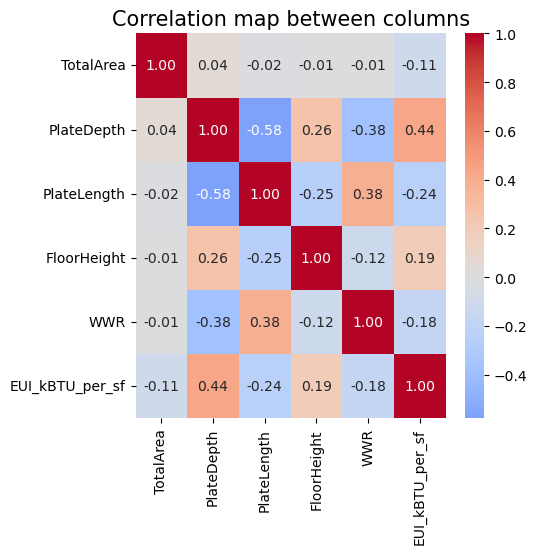

In [13]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),cmap='coolwarm', annot=True,fmt='.2f',center=0)
plt.title("Correlation map between columns",fontsize=15)
plt.show()

In [14]:
df.head()

,BuildingType,ClimateZone,TotalArea,PlateDepth,PlateLength,FloorHeight,WWR,SolarDesign,HVAC_Setting,EnvelopeQuality_Setting,LPD_Adjustment_Setting,Setpoint_Setting,HeatingCoil,CoolingCoil,EUI_kBTU_per_sf
0,College,1A,101793,122,350,13,74.152542,Bad,Baseline,UltraPerformance,Base,Baseline,Coil:Heating:Electric,Chiller:Electric:EIR,115.604715
1,College,1A,101793,122,350,13,74.152542,Bad,Baseline,UltraPerformance,Base,Expanded,Coil:Heating:Electric,Chiller:Electric:EIR,111.274307
2,College,1A,101793,122,350,13,74.152542,Good,Baseline,UltraPerformance,Base,Baseline,Coil:Heating:Electric,Chiller:Electric:EIR,112.613514
3,College,1A,101793,122,350,13,74.152542,Good,Baseline,UltraPerformance,Base,Expanded,Coil:Heating:Electric,Chiller:Electric:EIR,107.493595
4,College,1A,101793,122,350,13,25.000000,Typical,Baseline,UltraPerformance,Base,Baseline,Coil:Heating:Electric,Chiller:Electric:EIR,108.149023


## Converting to SI Units

In [15]:
#Converting from ft^2 to m^2
df['TotalArea']=df['TotalArea']/10.764

#Converting from ft to m
df['PlateDepth']= df['PlateDepth']/3.281
df['PlateLength']= df['PlateLength']/3.281
df['FloorHeight']=df['FloorHeight']/3.281

#Converting from kBTU/sf to kWh/m^2
df['EUI_kWh_per_m2']= df['EUI_kBTU_per_sf']*3.1546
df=df.drop('EUI_kBTU_per_sf',axis=1)

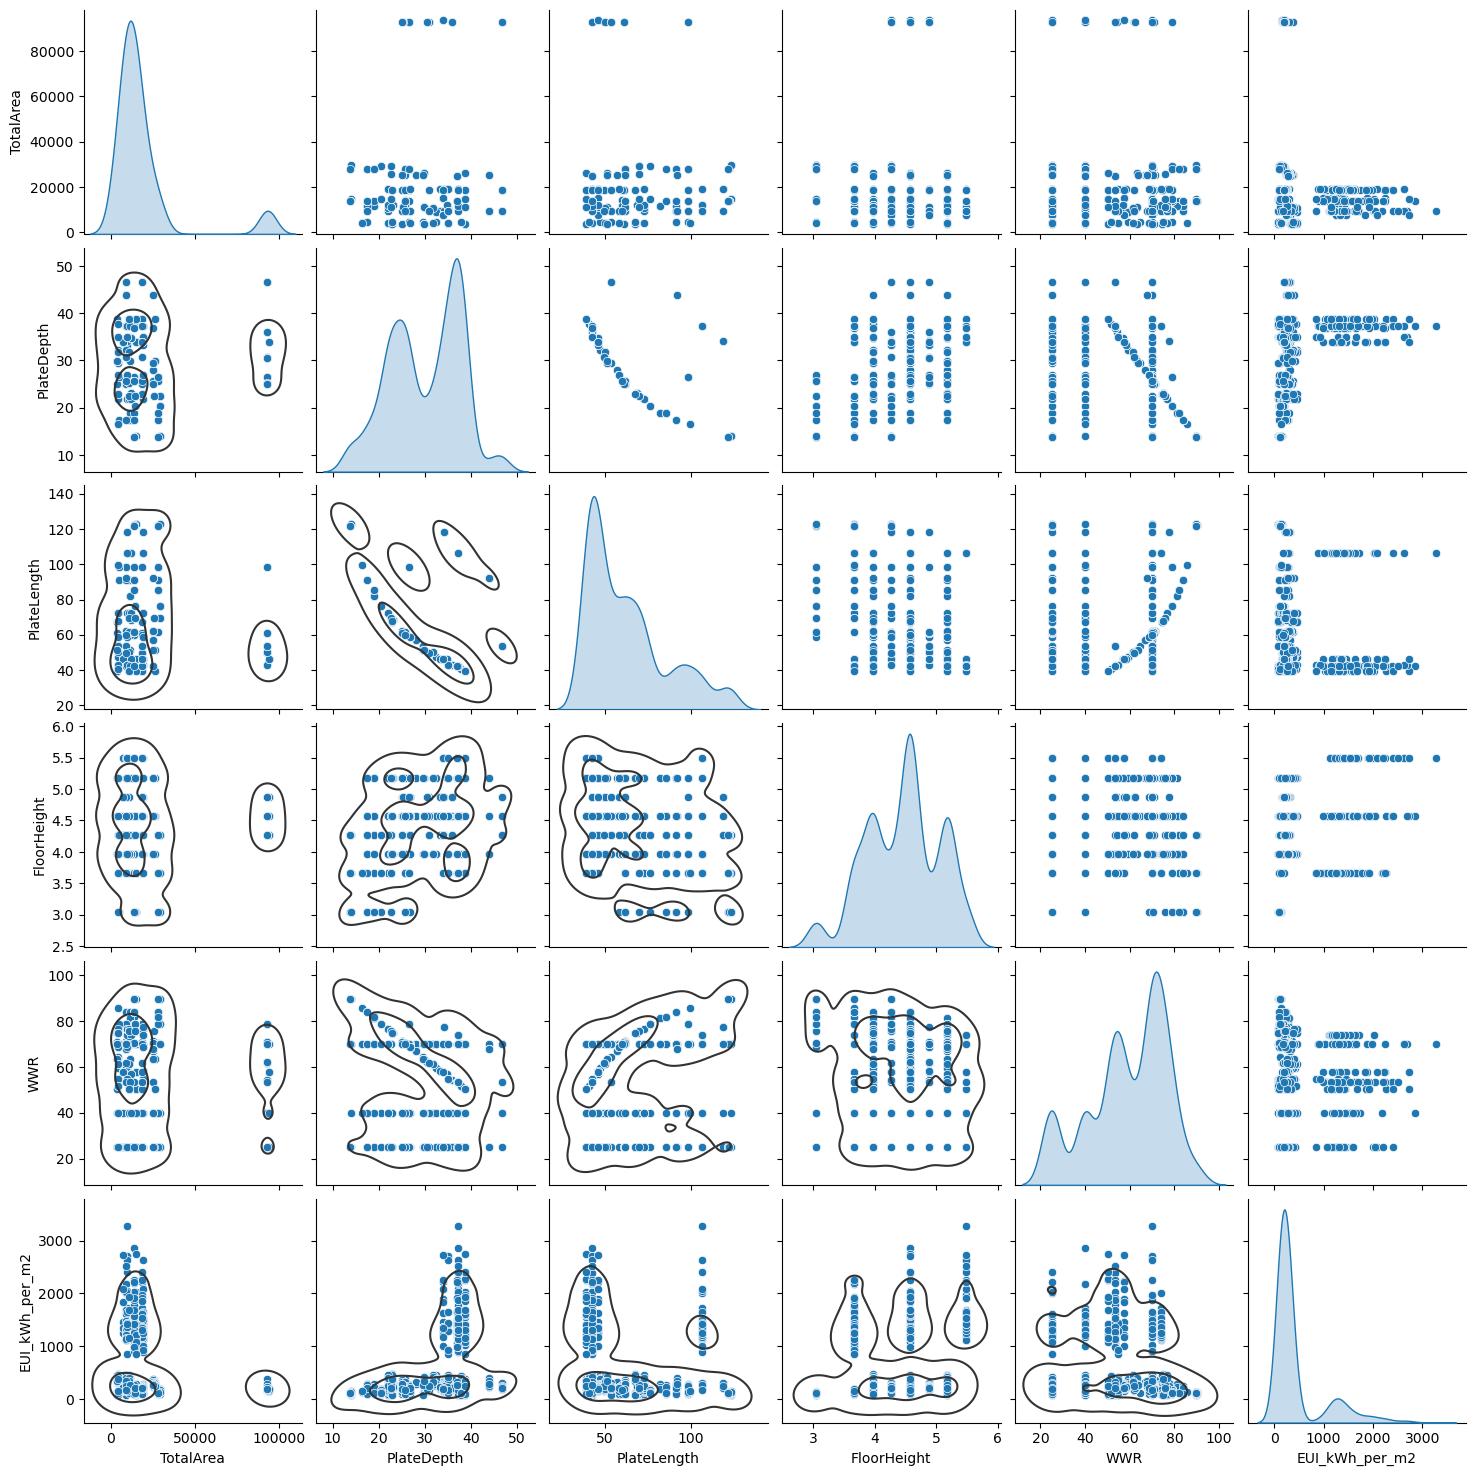

In [16]:
g=sns.pairplot(df.sample(1000), diag_kind='kde')
g.map_lower(sns.kdeplot, levels=3, color=".2")
plt.show()

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TotalArea,260748.0,18530.241856,20038.569353,3710.888146,9441.936083,13908.584169,18752.415459,93762.170197
PlateDepth,260748.0,29.636058,7.731609,13.715331,22.858884,29.868942,37.183785,46.632124
PlateLength,260748.0,63.915658,23.421466,39.317281,42.669918,60.042670,72.538860,123.133191
FloorHeight,260748.0,4.450708,0.600677,3.047851,3.962207,4.571777,4.876562,5.486132
WWR,260748.0,59.377107,17.593025,25.000000,50.390625,61.742424,71.228070,89.910314
EUI_kWh_per_m2,260748.0,436.847523,531.685603,57.054576,146.622920,232.365913,330.514076,3376.280132


## Data Preprocessing

In [18]:
#One hot encoding
model_df = pd.get_dummies(df, columns = ['BuildingType', 'ClimateZone'])

#Ordinal encoding
enc=OrdinalEncoder()
ordinalcols=['SolarDesign','EnvelopeQuality_Setting','HVAC_Setting','Setpoint_Setting','HeatingCoil','CoolingCoil'
            ,'LPD_Adjustment_Setting']
ordinal=enc.fit_transform(model_df[ordinalcols])
ordinal=pd.DataFrame(ordinal,columns=ordinalcols)
model_df=model_df.drop(ordinalcols+['HeatingCoil','CoolingCoil'],axis=1)
model_df=pd.concat([model_df,ordinal],axis=1)

model_df.head()

,TotalArea,PlateDepth,PlateLength,FloorHeight,WWR,EUI_kWh_per_m2,BuildingType_College,BuildingType_HighriseApartment,BuildingType_Hospital,BuildingType_Laboratory,BuildingType_LargeOffice,BuildingType_MediumOffice,BuildingType_MidriseApartment,BuildingType_Outpatient,ClimateZone_1A,ClimateZone_2A,ClimateZone_2B,ClimateZone_3A,ClimateZone_3B,ClimateZone_3C,ClimateZone_4A,ClimateZone_4B,ClimateZone_4C,ClimateZone_5A,ClimateZone_5B,ClimateZone_6A,ClimateZone_6B,ClimateZone_7A,SolarDesign,EnvelopeQuality_Setting,HVAC_Setting,Setpoint_Setting,HeatingCoil,CoolingCoil,LPD_Adjustment_Setting
0,9456.800446,37.183785,106.674794,3.962207,74.152542,364.686635,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,2.0,0.0,0.0,1.0,0.0,0.0
1,9456.800446,37.183785,106.674794,3.962207,74.152542,351.025930,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,2.0,0.0,1.0,1.0,0.0,0.0
2,9456.800446,37.183785,106.674794,3.962207,74.152542,355.250593,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,2.0,0.0,0.0,1.0,0.0,0.0
3,9456.800446,37.183785,106.674794,3.962207,74.152542,339.099294,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,2.0,0.0,1.0,1.0,0.0,0.0
4,9456.800446,37.183785,106.674794,3.962207,25.000000,341.166908,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,2.0,0.0,0.0,1.0,0.0,0.0


In [19]:
out=model_df['EUI_kWh_per_m2']
pred=model_df.drop('EUI_kWh_per_m2',axis=1)
x,X,y,Y=train_test_split(pred,out,test_size=0.2,random_state=66)

## Multiple Linear Regression Model

In [20]:
reg=LinearRegression(fit_intercept=False).fit(x,y)
result=reg.predict(X)
print("R2 Score: %.5f " % r2_score(result,Y))
print("MAE Score: %.5f " % mean_absolute_error(result,Y))
print("MSE Score: %.5f " % mean_squared_error(result,Y))

R2 Score: 0.90089 
MAE Score: 98.27803 
MSE Score: 25544.32632 


In [21]:
joblib.dump(reg, 'reg_model.sav')

['reg_model.sav']

In [22]:
#The intercept is turned off
pd.DataFrame(reg.coef_,index=pred.columns,columns=['Coefficient of multiple linear regression']).T

,TotalArea,PlateDepth,PlateLength,FloorHeight,WWR,BuildingType_College,BuildingType_HighriseApartment,BuildingType_Hospital,BuildingType_Laboratory,BuildingType_LargeOffice,BuildingType_MediumOffice,BuildingType_MidriseApartment,BuildingType_Outpatient,ClimateZone_1A,ClimateZone_2A,ClimateZone_2B,ClimateZone_3A,ClimateZone_3B,ClimateZone_3C,ClimateZone_4A,ClimateZone_4B,ClimateZone_4C,ClimateZone_5A,ClimateZone_5B,ClimateZone_6A,ClimateZone_6B,ClimateZone_7A,SolarDesign,EnvelopeQuality_Setting,HVAC_Setting,Setpoint_Setting,HeatingCoil,CoolingCoil,LPD_Adjustment_Setting
Coefficient of multiple linear regression,-0.000644,0.54306,0.165587,77.322357,0.049271,-116.465712,-103.362469,-69.745121,1207.717726,-190.707701,-270.384926,-128.478588,-14.608085,167.780851,134.587066,31.863655,107.582875,7.923935,-16.659477,5.132355,-38.594014,-26.971188,4.098495,-44.32831,7.036337,-31.133889,5.646434,-0.967735,-6.332252,-43.576408,-44.611572,7.774312,31.860772,-2.125194


## Random Forest Model

In [23]:
forest=RandomForestRegressor(n_estimators=200,verbose=2,n_jobs=-1).fit(x,y)

building tree 1 of 200building tree 2 of 200
building tree 3 of 200

building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.7s


building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69 of 200
building tree 70 of 200
building tree 71 of 200
building tree 72 of 200
building tree 73 of 200
building tree 74 of 200
building tree 75 of 200
building tree 76 of 200
building tree 77

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   33.3s


building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200
building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200
building tree 167 of 200
building tree 168 of 200
building tree 169 of 200
building tree 170 of 200
building tree 171 of 200
building tree 172 of 200
building tree 173 of 200
building tree 174 of 200
building tree 175 of 200
building tree 176 of 200
building tree 177 of 200
building tree 178 of 200
building tree 179 of 200
building tree 180 of 200
building tree 181 of 200
building tree 182 of 200
building tree 183 of 200
building tree 184 of 200
building tree 185 of 200
building tree 186 of 200
building tree 187 of 200
building tree 188 of 200
building tree 189 of 200
building tree 190 of 200
building tree 191 of 200
building tree 192 of 200
building tree 193 of 200
building tree 194 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   45.1s finished


In [24]:
result=forest.predict(X)
print("R2 Score: %.5f " % r2_score(result,Y))
print("MAE Score: %.5f " % mean_absolute_error(result,Y))
print("MSE Score: %.5f " % mean_squared_error(result,Y))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.7s


R2 Score: 0.99990 
MAE Score: 3.09734 
MSE Score: 29.18961 


[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    1.0s finished


## Saving Random Forest Model

###### Due to deployment issues, we must have less size for the program. So, we will have to decrease the number of estimators which will have significant effect on accuracy

In [25]:
forest=RandomForestRegressor(n_estimators=10,verbose=2,n_jobs=-1).fit(x,y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 10building tree 2 of 10
building tree 3 of 10

building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    1.7s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.6s finished


In [26]:
result=forest.predict(X)
print("R2 Score: %.5f " % r2_score(result,Y))
print("MAE Score: %.5f " % mean_absolute_error(result,Y))
print("MSE Score: %.5f " % mean_squared_error(result,Y))

R2 Score: 0.99988 
MAE Score: 3.39534 
MSE Score: 35.05133 


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished


In [27]:
joblib.dump(forest,'forest_model.sav')

['forest_model.sav']